<a href="https://colab.research.google.com/github/EstherAbayomi07/S_tar/blob/main1/_SECTION_25_Definitive_Python_time_series_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#SECTION25

In [ ]:
from google.colab import files

files.upload()#load the bitcoin csv file in the folder

In [3]:
import pandas

dataframe = pandas.read_csv("bitcoin_prices.csv")

dataframe

,Unnamed: 0,Date,Value
0,0,2016-01-01,432.33
1,1,2016-01-02,433.94
2,2,2016-01-03,428.13
3,3,2016-01-04,433.00
4,4,2016-01-05,431.90
...,...,...,...
1884,1884,2021-02-27,46340.31
1885,1885,2021-02-28,46155.87
1886,1886,2021-03-01,45113.92
1887,1887,2021-03-02,49618.43


In [4]:
dataframe = dataframe.drop(["Unnamed: 0"],
               axis = 1)

dataframe

,Date,Value
0,2016-01-01,432.33
1,2016-01-02,433.94
2,2016-01-03,428.13
3,2016-01-04,433.00
4,2016-01-05,431.90
...,...,...
1884,2021-02-27,46340.31
1885,2021-02-28,46155.87
1886,2021-03-01,45113.92
1887,2021-03-02,49618.43


In [5]:
dataframe.rename(columns = {
    "Date": "ds",
    "value": "y"
},  inplace = True)

dataframe

,ds,Value
0,2016-01-01,432.33
1,2016-01-02,433.94
2,2016-01-03,428.13
3,2016-01-04,433.00
4,2016-01-05,431.90
...,...,...
1884,2021-02-27,46340.31
1885,2021-02-28,46155.87
1886,2021-03-01,45113.92
1887,2021-03-02,49618.43


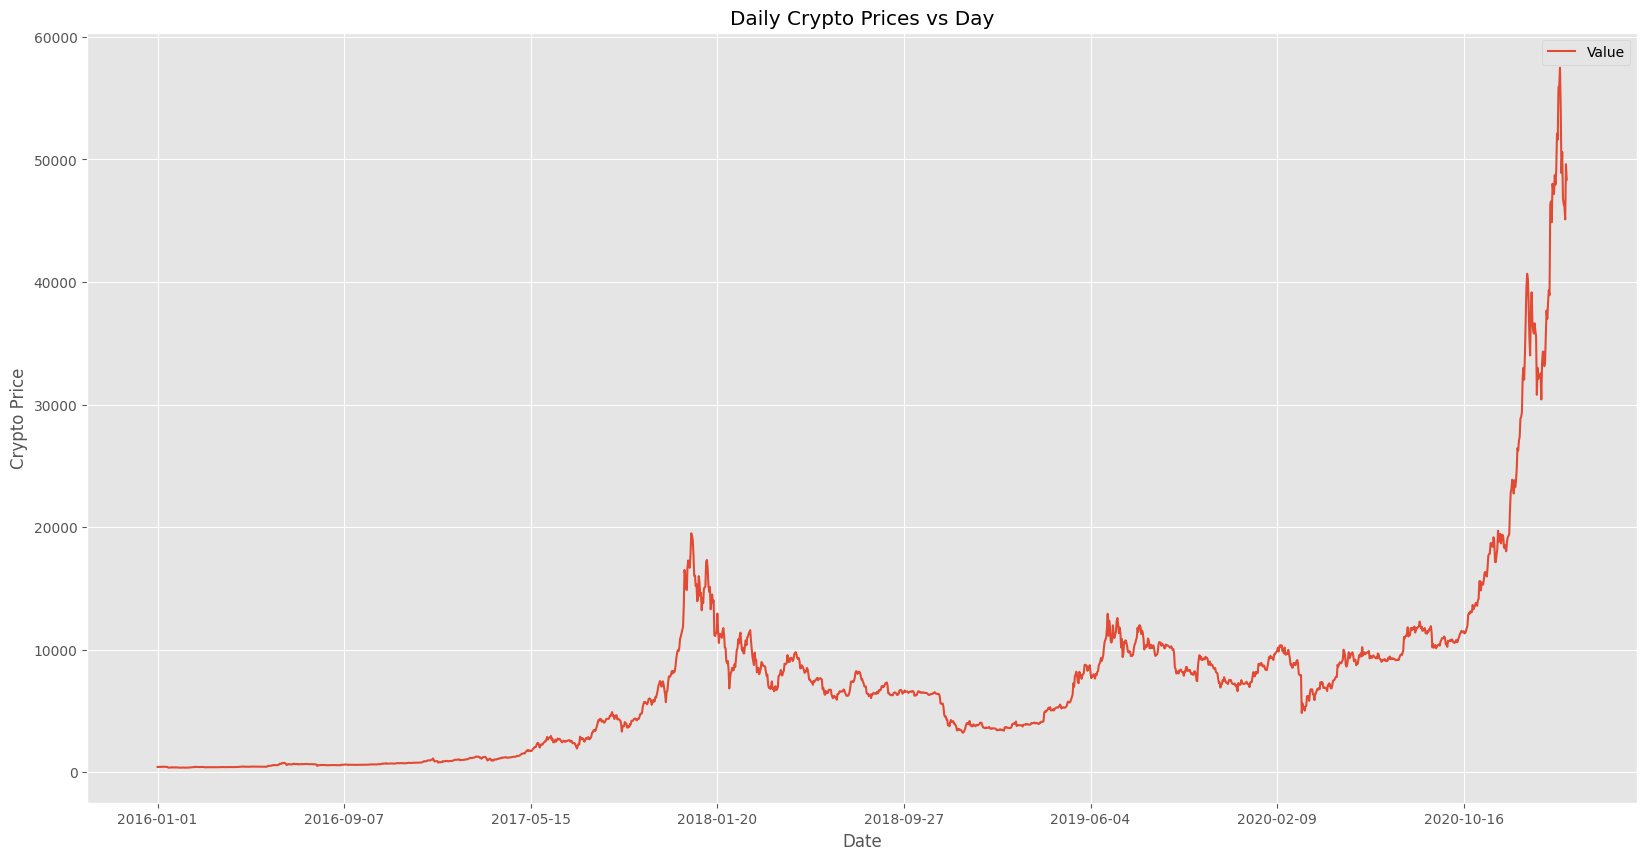

In [8]:
import matplotlib.pyplot as pyplot

pyplot.style.use("ggplot")

graph = dataframe.set_index("ds").plot(figsize = (20, 10))

graph.set_title("Daily Crypto Prices vs Day")

graph.set_xlabel("Date")

graph.set_ylabel("Crypto Price")

pyplot.show()

In [ ]:

from fbprophet import Prophet

Prophet

In [ ]:
INTERVAL_WIDTH = 0.9

model = Prophet(interval_width = INTERNAL_WIDTH,
                daily_seasonality = True)


model.fit(dataframe)

In [ ]:
NUMBER_OF_PERIODS = 91

future_dataframe = model.make_future_dataframe(periods = NUMBER_OF_PERIODS, 
                                               freq = "D")

future_dataframe

In [ ]:
prediction = model.predict(future_dataframe)


prediction

In [ ]:
prediction_last_days = prediction[["yhat"]].iloc[[-1]]

prediction_last_days

In [ ]:
from fbprophet import cross_validation

dataframe_cross_validation = cross_validation(model,
                 initial = "900 days"
                 period = "45 days "
                 horizon = "91 days")

dataframe_cross_validation

In [ ]:
from fbprophet.diagnostics import performance_metrics

performance_dataframe = performance_metrics(dataframe_cross_validation)

performance_dataframe

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(dataframe_cross_validation,
                             metric = "rmse")

In [ ]:
plot_cross_validation_metric(dataframe_cross_validation,
                             metric = "mape")

In [ ]:
pyplot.style.use("default")

model.plot(prediction)

pyplot.show()


In [ ]:
model,plot_components(prediction)

pyplot.show

In [ ]:
model = Prophet(interval_width = INTERVAL_WIDTH)

monthly_model.fit(dataframe)

NUMBER_OF_PERIODS = 3

future_monthly_dataframe = monthly_model.make_future_dataframe(periods = )

future_monthly_dataframe


In [ ]:
monthly_predictions = monthly_model.predict(future_monthly_dataframe)

monthly_predictions

In [ ]:
prediction_3_month = monthly_predictions[["yhat"]].iloc[[-1]]

predictions_3_montth

In [ ]:
monthly_model.plot(monthly_predictions, uncertainty = True)

pyplot.show()

In [ ]:
weekly_model = Prophet(internal_width = INTERNAL_WIDTH,
                       weekly_seasonality = True)

weekly_model.fit(dataframe)

WEEKS_IN_TIME_INTERVAL = 12

future_weekly_dataframe = weekly_model.make_future_dataframe(periods = WEEKS_IN_TIME_INTERVAL,
                                                             freq  = "W")

weekly_predictions = weekly_model.predict(future_weekly_dataframe)

weekly_predictions

In [ ]:
final_week_prediction = weekly_predictions[["yhat"]].iloc[[-1]]

final_week_prediction

In [ ]:
weekly_model.plot(weekly_predictions, uncertainty = True)

pyplot.show()

In [ ]:
print(prediction_last_days)

In [ ]:
print(prediction_3_month)

In [ ]:
print(final_week_prediction)